In [27]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [28]:
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [29]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()

In [30]:
!ls

data  face-mask-dataset.zip  kaggle.json  mask1.jpg  sample_data


In [31]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image
from sklearn.model_selection import train_test_split

In [32]:
with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

labels = with_mask_labels + without_mask_labels

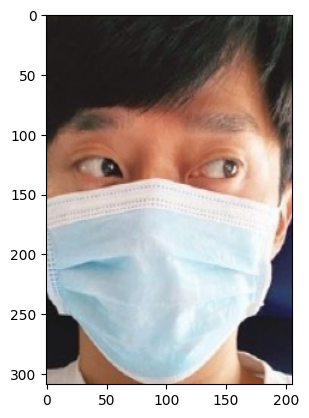

In [33]:
img = mpimg.imread('/content/data/with_mask/with_mask_672.jpg')
imgplot = plt.imshow(img)
plt.show()

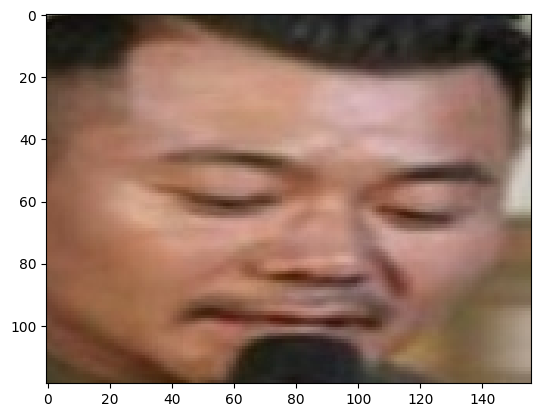

In [34]:
img = mpimg.imread('/content/data/without_mask/without_mask_23.jpg')
imgplot = plt.imshow(img)
plt.show()

In [35]:
with_mask_files = os.listdir('/content/data/with_mask')
without_mask_files = os.listdir('/content/data/without_mask')

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [36]:
X = np.array(data)
Y = np.array(labels)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [37]:
import tensorflow as tf
from tensorflow import keras

num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [38]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [39]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 5s 20ms/step - loss: 0.4968 - acc: 0.7835 - val_loss: 0.2936 - val_acc: 0.8595
Epoch 2/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2955 - acc: 0.8793 - val_loss: 0.2976 - val_acc: 0.8826
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2389 - acc: 0.9097 - val_loss: 0.2338 - val_acc: 0.8959
Epoch 4/5
170/170 [==============================] - 4s 21ms/step - loss: 0.2194 - acc: 0.9154 - val_loss: 0.2263 - val_acc: 0.9091
Epoch 5/5
170/170 [==============================] - 3s 20ms/step - loss: 0.1782 - acc: 0.9347 - val_loss: 0.2235 - val_acc: 0.9207


In [40]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 11ms/step - loss: 0.2047 - acc: 0.9186
Test Accuracy = 0.9185969829559326


In [ ]:
def predict_mask_from_image(input_image_path):
    #model = load_model()  # Load your model here

    input_image = cv2.imread(input_image_path)

    input_image_resized = cv2.resize(input_image, (128, 128))
    input_image_scaled = input_image_resized / 255
    input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

    input_prediction = model.predict(input_image_reshaped)
    print(input_prediction)

    input_pred_label = np.argmax(input_prediction)
    print(input_pred_label)

    if input_pred_label == 1:
        print('The person in the image is wearing a mask')
    else:
        print('The person in the image is not wearing a mask')


input_image_path = input('Path of the image to be predicted: ')
predict_mask_from_image(input_image_path)